In [9]:
%matplotlib inline


from IPython.core.display import HTML
from IPython.display import IFrame

# imports a bunch of 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import seaborn as sns

from keras.layers import Dense
from keras.models import Model, Sequential
from keras import initializers
import os
import sys



from IPython.display import IFrame
from IPython.display import HTML

In [11]:
HTML('<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Actually, no <a href="https://twitter.com/springerpub?ref_src=twsrc%5Etfw">@springerpub</a>, that&#39;s not Viridis. Someone butchered the online figure processing (PDF is OK). &quot;Chasing Rainbows: A Color-Theoretic Framework for Improving and Preserving Bad Colormaps&quot; <a href="https://t.co/USMkeQAdsD">https://t.co/USMkeQAdsD</a> <a href="https://t.co/zwETyXMVzB">pic.twitter.com/zwETyXMVzB</a></p>&mdash; Stefan van der Walt (@stefanvdwalt) <a href="https://twitter.com/stefanvdwalt/status/1166023380048306177?ref_src=twsrc%5Etfw">August 26, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [16]:
HTML('<blockquote class="twitter-tweet"><p lang="en" dir="ltr">It&#39;s hard to let go ¯\_(ツ)_/¯ <a href="https://t.co/JWA41x1WNM">https://t.co/JWA41x1WNM</a> One of the weirder things I&#39;ve seen on the Google AI blog.</p>&mdash; Stefan van der Walt (@stefanvdwalt) <a href="https://twitter.com/stefanvdwalt/status/1167536735141515264?ref_src=twsrc%5Etfw">August 30, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [15]:
IFrame('https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html', width=1000, height=1000)

# What is Machine Learning?

Everyone write down their own definition

* “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 

* “Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.

* “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University

* Machine learning research is part of research on artificial intelligence, seeking to provide knowledge to computers through data, observations and interacting with the world. That acquired knowledge allows computers to correctly generalize to new settings.

* “Machine Learning is the science of getting computers to learn and act like humans do, and improve their learning over time in autonomous fashion, by feeding them data and information in the form of observations and real-world interactions.”

# Machine Learning Basic Concepts

## Representations
* A set of classifers or the language that a computer understands
* How the model connects data to the objective

**The way humans make inference from data is different than machines**

Examples: 
* K-nearest neighbors
* support vector machines
* decision trees
* neural networks
* ...

## Evaluation
* how the model determines its success at completing an objective

**The ways humans and computers quantify success at an objective is very different**

Examples: 
* accuracy/error rate
* squared error
* likelihood
* k-l divergence (entropy between two distributions)
* ...

# Optimization
* the model search method
* how the model improves itself
* how the model values exploration vs. exploitation

**The way that humans and computers optimize and solve problems is very different**

Examples: 
Combinatorial optimization
* random search
* greedy search
Continuous optimization
* gradient descent
* quasi-Newton method

![figure](images/Componets_of_a_learning_algorithm.png)

In [2]:
IFrame(src='http://www.r2d3.us/visual-intro-to-machine-learning-part-1/', width=1000, height=800)

# How we get machines to learn

* Choose the best learning algorithm

Other things that matter
* Collect and collate meaningful data

* Provide the data to the machine in a form that emphasizes the learning objective

**It is not just about solving problems or doing thing. Machines that learn are useful to humans because with all of their processing power they are able to highlight patterns in big data that would have otherwise been missed**

# Challenges and Limitations

## Overfitting

![figure](images/Explaining_Overfitting.png)

* It is possible to get perfect accuracy on a test set but have no ability to conduct inference on a new problem 
* The model is not **generalizable**

I can classify types of apples but show me an orange and I am useless

# Overfitting Example with Polynomials

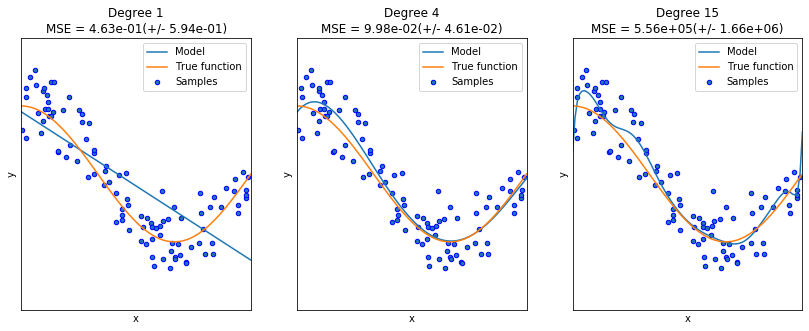

In [6]:
# Defines the function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


# sets a random seed for consistent plotting
np.random.seed(0)

# sets the number of samples
n_samples = 100
# Sets the range in degrees
degrees = [1, 4, 15]

# adds some noise to the data
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

# does the plotting
plt.figure(figsize=(14, 5))

# Loops around the number of degrees selected
for i in range(len(degrees)):

    # makes the subplot
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # creates the polynomial
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    # Least squares linear regression
    linear_regression = LinearRegression()

    # estabilishes a fitting pipeline
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    # does the fit
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    # Defines a linear vector
    X_test = np.linspace(0, 1, 100)

    # plots the real model
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")

    # plots the generated data
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    # sets the axies format
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))

# Problems with Generalization
## Overfitting
* Your model is way more complex than the problem you have

# A Simple Linear Neural Network
## Conducting a linear fit with a single layer Neural Network

In [4]:
# function that makes movies
def make_movie(pathIn, pathOut, fps):

    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    # for sorting the file names properly
    files.sort(key=lambda x: x[5:-4])
    files.sort()
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    # for sorting the file names properly
    files.sort(key=lambda x: x[5:-4])

    for i in range(len(files)):
        filename = pathIn + files[i]
        # reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width, height)

        # inserting the frames into an image array
        frame_array.append(img)
    out = cv2.VideoWriter(pathOut, cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [5]:
# Real function
def linear_model(x):
    return 3*x + 7


# defines a vector and generates data with random noise
x = np.linspace(0, 10, 10)
y = linear_model(x) + np.random.randn(len(x)) * 1

# Builds a class for defining a simple linear neural network


class Model:

    def __init__(self, input_dim, dirName):
        self.model = Sequential()

        self.model.add(Dense(1, activation='relu', input_dim=input_dim))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName

        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory ", dirName,  " Created ")
        except FileExistsError:
            print("Directory ", dirName,  " already exists")

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                if epoch % 10 == 0:
                    plt.plot(x_train, y_train, 'o')
                    x_predict = np.linspace(
                        np.min(x_train), np.max(x_train), 100)
                    plt.plot(x_predict, self.model.predict(x_predict))
                    plt.axis([
                        x_train.min() - 0.5, x_train.max() + 0.5,
                        y_train.min() - 0.5, y_train.max() + 0.5,
                    ])
                    plt.title(f"Epoch #{epoch}")
                    plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                    plt.clf()


new_model = Model(1, 'linear_fit')
new_model.train(x, y, epochs=10000)
make_movie('./linear_fit/', './linear_fit/linear_fit.mp4', 30)

W0901 16:48:50.468381 4413650368 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 16:48:50.485727 4413650368 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 16:48:50.489615 4413650368 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0901 16:48:50.503836 4413650368 deprecation_wrapper.py:119] From /Users/joshuaagar/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0901 16

Directory  linear_fit  already exists
Epoch 1/1
10/10 [==============================] - 0s 15ms/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - los

Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 137us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 177us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 245us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 191us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 266us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 154us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 352us/step - loss: 560.2098 - acc: 0.0000e+00
E

Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 74us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 189us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 74us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 117us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 132us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 67us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 74us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 145us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 154us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 151us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 171us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 150us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 177us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 158us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 144us/step - loss: 560.2098 - acc: 0.0000e+00


Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 129us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 140us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 173us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 153us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 136us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 165us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 159us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 162us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 147us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 180us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 177us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 177us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 166us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 159us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 157us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 117us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 147us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 140us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 125us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 164us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 158us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 71us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 71us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 318us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 182us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 123us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 176us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 181us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 182us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 258us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 257us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 196us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 128us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 166us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 163us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 144us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 202us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 162us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 144us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 132us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 167us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 150us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 139us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 154us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 396us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 117us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 148us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 193us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 330us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 145us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2097 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 164us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 176us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 149us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 131us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 160us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 169us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 144us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 137us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 178us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 132us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 123us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 140us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 187us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 142us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 147us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 160us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 168us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 156us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 137us/step - loss: 560.2098 - acc: 0.0000e+00
E

Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 139us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 137us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 234us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 170us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 170us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 153us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
E

Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 123us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 73us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 131us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 64us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 68us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 65us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 70us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 71us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 74us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 149us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 333us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 297us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 193us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 193us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 146us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 200us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 230us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 240us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 178us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 69us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 129us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 148us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 142us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2097 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1


Epoch 1/1
10/10 [==============================] - 0s 139us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 146us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 154us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 74us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 80us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 139us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 79us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 128us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 116us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2097 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 139us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 81us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 123us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 143us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 120us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 184us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 196us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 131us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 155us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 141us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 188us/step - loss: 560.2098 - acc: 0.0000e+00


Epoch 1/1
10/10 [==============================] - 0s 132us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 126us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 57us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 76us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 142us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 140us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 136us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 97us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 117us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 128us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 136us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 110us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 145us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 142us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 118us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 146us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 83us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 108us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 78us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 102us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 77us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 136us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 174us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 171us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 115us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 171us/step - loss: 560.2098 - acc: 0.0000e+00
Epoc

Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 107us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 132us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 128us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 201us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epo

Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 82us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 122us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 153us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 109us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch

Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 100us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 106us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 84us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 95us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 101us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 180us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 114us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 124us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 88us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 75us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 92us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 90us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 72us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 94us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 127us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 119us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 87us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1

Epoch 1/1
10/10 [==============================] - 0s 86us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 133us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 179us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 284us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 104us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 105us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 121us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 85us/step - loss: 560.2098 - acc: 0.0000e+00
Ep

Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 98us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 112us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 160us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 93us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 96us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 103us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 89us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 91us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 

Epoch 1/1
10/10 [==============================] - 0s 163us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 134us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 138us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 150us/step - loss: 560.2097 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 182us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 185us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 130us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 111us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 99us/step - loss: 560.2098 - acc: 0.0000e+00
Epoch 1/1
10/10 [==============================] - 0s 113us/step - loss: 560.2098 - acc: 0.0000e+00
E

NameError: name 'isfile' is not defined

<Figure size 432x288 with 0 Axes>

## Conducting a linear fit with a single layer Neural Network

In [7]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/wa15HLi4kMI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/Users/joshuaagar/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## What do you think happens when we make this network wider and deeper?

## Linear Fitting with a Deep Neural Network

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        
        # builds a deeper NN
        self.model = Sequential()
        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName

        # Makes the directory to save the files
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory ", dirName,  " Created ")
        except FileExistsError:
            print("Directory ", dirName,  " already exists")

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train), np.max(x_train), 100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                    x_train.min() - 0.5, x_train.max() + 0.5,
                    y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

In [ ]:
new_model = Model(1, 'deep_linear_fit')
new_model.train(x,y, epochs = 1000)
make_movie('./deep_linear_fit/', './deep_linear_fit/deep_linear_fit.mp4', 20)

## Linear Fitting with a Deep Neural Network

In [ ]:
HTML('<iframe width="800" height="600" src="https://www.youtube.com/embed/j3hMh7hzTic" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Application to more complex functions
## Linear fit to a sine 

### What will happen if we train a single layer neural network on a data following a sine function?

### Code

In [ ]:
# Function to make a sine function
def sine(x):
    return np.sin(x) 

# creates a linear space vector from -3 to 3 
x = np.linspace(-3,3,25)
# adds some random noise to the sine function
y = sine(x) + np.random.randn(len(x)) * 0.15

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(1, activation='linear', input_dim=input_dim))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                if epoch % 10 == 0:
                    plt.plot(x_train, y_train, 'o')
                    x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                    plt.plot(x_predict, self.model.predict(x_predict))
                    plt.axis([
                       x_train.min() - 0.5, x_train.max() + 0.5,
                       y_train.min() - 0.5, y_train.max() + 0.5,
                    ])
                    plt.title(f"Epoch #{epoch}")
                    plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                    plt.clf()
                
# Defines the model                
new_model = Model(1, 'linear_fit')

# Trains the model
new_model.train(x,y, epochs = 1, save_imgs = False)
plt.plot(x, y, 'o')

# computes the prediction
x_predict = np.linspace(np.min(x),np.max(x),100)
plt.plot(x_predict, new_model.model.predict(x_predict))

# What happens when we make this network deeper? 

### Code

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                   x_train.min() - 0.5, x_train.max() + 0.5,
                   y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

In [ ]:
new_model = Model(1, 'deep_sine_fit')
new_model.train(x,y, epochs = 1000)
make_movie('./deep_sine_fit/', './deep_sine_fit/deep_sine_fit.mp4', 20)

In [ ]:
HTML('<iframe width="800" height="700" src="https://www.youtube.com/embed/P-vVExENCWs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# A Very Very Simple Way to Prevent Overfitting
![figure](images/dropout.png)
<cite data-cite="7099837/98IS3JJH"></cite>

### Code for Adding Dropout

In [ ]:
class Model:

    def __init__(self, input_dim, dirName):
        self.model     = Sequential()

        self.model.add(Dense(40, activation='relu', input_dim=input_dim))
        
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4)) #These are dropout layers
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dropout(.4))
        self.model.add(Dense(40, activation='relu'))
        self.model.add(Dense(1,  activation='linear'))
        self.model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        self.dirName = dirName
        
        try:
            # Create target Directory
            os.mkdir(dirName)
            print("Directory " , dirName ,  " Created ") 
        except FileExistsError:
            print("Directory " , dirName ,  " already exists")
            
    

    def train(self, x_train, y_train, epochs=101, save_imgs=True):
        for epoch in np.arange(1, epochs):
            self.model.fit(x_train, y_train, batch_size=128)

            if save_imgs:
                plt.plot(x_train, y_train, 'o')
                x_predict = np.linspace(np.min(x_train),np.max(x_train),100)
                plt.plot(x_predict, self.model.predict(x_predict))
                plt.axis([
                   x_train.min() - 0.5, x_train.max() + 0.5,
                   y_train.min() - 0.5, y_train.max() + 0.5,
                ])
                plt.title(f"Epoch #{epoch}")
                plt.savefig(self.dirName + f"/plot_{epoch:04d}.png")
                plt.clf()

In [ ]:
new_model = Model(1, 'deep_sine_fit_dropout')
new_model.train(x,y, epochs = 3000)
make_movie('./deep_sine_fit_dropout/', './deep_sine_fit_dropout/deep_sine_fit_dropout.mp4', 20)

# How Training Looks with Dropout

In [ ]:
HTML('<iframe width="800" height="721" src="https://www.youtube.com/embed/oxdv7W9_I4s" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Machine learning is just regression in very high dimensional space

# To apply machine learning you need to think about how to structure a real-world objective as an easy to optimize problem

# Modern Demonstrations of Machine learning 

## Image Classification

* Convolutional neural networks (CNNs) have shown remarkable performance in image classification
<img src="images/classification.jpg" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
<img src="images/vgg16.png" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
## Feature Vector
<img src="images/euclidian_space.jpg" width="800">
<cite data-cite="7099837/DQ4TWHPL"></cite>

# Image Classification
## Visualization of the latent space

**Definition: latent space** - a hidden mapping of a data space onto a "latent space" where similar datapoints are grouped together

## Visualization of the latent space

In [ ]:
IFrame(src='https://nicola17.github.io/tfjs-tsne-demo/', width=1000, height=1000)

# This is not just for simple problems

In [ ]:
IFrame(src='https://artsexperiments.withgoogle.com/tsnemap/', width=1000, height=1000)

# Image Classification
## Applicability in Medicine
<img src="images/nature21056-f4.jpg" width="800">
<cite data-cite="7099837/ZBWQHJS2"></cite>

# Identifying object and segmentation

In [ ]:
IFrame(src='http://cocodataset.org/#home', width=1000, height=1000)

# Identifying object and segmentation

<img src="images/Image_Segmenation.png" width="800">

## Segmentation can be done in real time

In [ ]:
IFrame(src='https://2.bp.blogspot.com/-ioaFybzPJ04/WpW3bRaMWdI/AAAAAAAACZM/j4st8tHRYvoW4szUF5ql62dnI6SLhUKQACLcBGAs/s400/image1.gif', width=400, height=400)

## Segmentation can be done in real time

In [ ]:
HTML('<iframe width="900" height="592" src="https://www.youtube.com/embed/JgXVAio8iA8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Segmentation in Materials Science
<img src="images/Materials_Segmentation.webp" width="800">
<cite data-cite="7099837/GYCAHE9F"></cite>

# Image Segmentation in Biology
<img src="images/Bio_segmentation.png" width="800">
<cite data-cite="7099837/VWZVD5B8"></cite>

# Natural Language Processing
## Your Amazon Alexa/Siri/Google Assistant

In [ ]:
HTML('<iframe width="1231" height="1041" src="https://www.youtube.com/embed/D86YAoynYbA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Natural Language Processing
### Language is a sequence
Models for understanding language can be applied to temporally dependent data

<img src="images/RNN_language explained.png" width="800">

### Fake Shakespear Generation
```
VIOLA:
Why, Salisbury must find his flesh and thought
That which I am not aps, not a man and in fire,
To show the reining of the raven and the wars
To grace my hand reproach within, and not a fair are hand,
That Caesar and my goodly father's world;
When I was heaven of presence and our fleets,
We spare with hours, but cut thy council I am great,
Murdered and by thy master's ready there
My power to give thee but so much as hell:
Some service in the noble bondman here,
Would show him to her wine.

KING LEAR:
O, if you were a feeble sight, the courtesy of your law,
Your sight and several breath, will wear the gods
With his heads, and my hands are wonder'd at the deeds,
So drop upon your lordship's head, and your opinion
Shall be against your honour.
```

## This can be done in materials science

<img src="images/NLP_Materials_1.webp" width="800">
<cite data-cite="7099837/T9N2GPL4"></cite>

<img src="images/NLP_Materials_2.webp" width="800">
<cite data-cite="7099837/T9N2GPL4"></cite>

# Expanding what is language
* Language is just sequential information which conveys information $\rightarrow$ this is the same as spectra

In [ ]:
HTML('<iframe width="600" height="150" src="https://www.youtube.com/embed/3dpsd5gTv-8" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Generative Models
* When you want to generate an example from a data distribution

### Could be a text Description
<img src="images/StackGAN1.png" width="800">
<cite data-cite="7099837/9SR3FFZQ"></cite>

<img src="images/StackGAN2.png" width="800">
<cite data-cite="7099837/9SR3FFZQ"></cite>

## Could be a input image or a sketch
<img src="images/pix2pix.png" width="800">
<cite data-cite="7099837/FSZA5QTS"></cite>

## Or a live updating semantic map

In [ ]:
IFrame(src='http://nvidia-research-mingyuliu.com/gaugan/', width=1400, height=400)

### Latent Transformations

In [ ]:
IFrame(src='https://temporal-cycle-consistency.github.io/assets/mp4/top.mp4', width=1000, height=600)

# Reinforcement Learning

In [ ]:
HTML('<iframe width="900" height="544" src="https://www.youtube.com/embed/Q4bMcUk6pcw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Planning Chemical Synthesis
<img src="images/Chemical_Synthesis_1.png" width="800">
<cite data-cite="7099837/D62ZJ2CR"></cite>

<img src="images/Chemical_Synthesis_2.png" width="800">
<cite data-cite="7099837/D62ZJ2CR"></cite>

# References 

<div class="cite2c-biblio"></div>